In [43]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools

# sklearn
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Матрица ошибок',
                          cmap=plt.cm.Blues,
                          plot_place=[0, 0, 0]):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.subplot(*plot_place)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Истина')
    plt.xlabel('Прогноз')

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

SPLIT_NUMBER = 4

def confusionMatrices(estimator, classes = []):
    classes_data = data['class'].apply(lambda x: int(x))
    splits = SPLIT_NUMBER
    kf = KFold(n_splits=splits)
    n = 1
    plt.figure(figsize=(10, 10))
    for train, test in kf.split(vectorized_data):
        estimator.fit(vectorized_data[train], classes_data.iloc[train].values.ravel())
        predicted = estimator.predict(vectorized_data[test])

        matrix = confusion_matrix(classes_data.iloc[test], predicted)
        plot_confusion_matrix(matrix, classes, plot_place=[int(splits / 2) + splits % 2, 2, n])
        n += 1

def crossScores(estimator):
    classes_data = data['class'].apply(lambda x: int(x))
    crossScoreAccuracy = cross_val_score(estimator, scoring='accuracy', X=vectorized_data, y=classes_data.tolist(), cv=SPLIT_NUMBER)
    crossScoreF = cross_val_score(estimator, scoring='f1', X=vectorized_data, y=classes_data.tolist(), cv=SPLIT_NUMBER)
    crossScoreRocAuc = cross_val_score(estimator, scoring='roc_auc', X=vectorized_data, y=classes_data.tolist(), cv=SPLIT_NUMBER)

    fig, axs = plt.subplots(SPLIT_NUMBER, figsize=(10, 20))
    
    axs[0].plot(crossScoreAccuracy)
    axs[0].set_title("Точность")
    axs[0].set(xlabel='Порядковый номер разбиения', ylabel='Значение метрики')

    axs[1].plot(crossScoreF)
    axs[1].set_title("F1")
    axs[1].set(xlabel='Порядковый номер разбиения', ylabel='Значение метрики')
    
    axs[2].plot(crossScoreRocAuc)
    axs[2].set_title("ROC AUC")
    axs[2].set(xlabel='Порядковый номер разбиения', ylabel='Значение метрики')


from sklearn.model_selection import GridSearchCV

def gridSearch(estimator, paramGrid):
    classes_data = data['class'].apply(lambda x: int(x))
    
    xTrain, xTest, yTrain, yTest = train_test_split(vectorized_data, classes_data, test_size=1 / SPLIT_NUMBER)

    searchCV = GridSearchCV(estimator, param_grid=paramGrid, n_jobs=-1, scoring='f1', refit=False)
    searchCV.fit(xTrain, yTrain)
    print(searchCV.best_params_)
    searchCV.cv_results_

In [7]:
import pandas as pd
from sklearn.utils import shuffle

suicidal = pd.read_csv("PreparedDatasets/suicidal.csv")
non_suicidal = pd.read_csv("PreparedDatasets/non_suicidal.csv").head(1500)

data = suicidal.append(non_suicidal)

data = shuffle(data)
data

/var/folders/nd/rxp2phv12xl4m1wk92ksqgxr0000gn/T/ipykernel_1319/1614600193.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = suicidal.append(non_suicidal)


,Unnamed: 0,text,class
940,940,Сходила я к специалистам. Скоро назначат лечен...,1
370,457,"Возможно, я не права, но у меня есть убеждение...",0
873,873,Не знаю почему пишу сюда просто нету желания ж...,1
817,817,"Мир во мне не нуждается, а я не нуждаюсь в мире",1
967,1232,Всегда всё пижу.,0
...,...,...,...
642,802,tw : s/h block don't report • • • • • • beanst...,0
452,452,Я бы отдал всё чтобы меня кто-то понял.,1
305,374,"Дети щас покупаю телефон, я потом напишу тут!",0
301,301,"Вчера мне пришлось сожрать всю аптечку, чтобы ...",1


In [8]:
from pymorphy3 import MorphAnalyzer
import nltk
from nltk.corpus import stopwords

# nltk.download('stopwords')

an = MorphAnalyzer(lang='ru')
stops = stopwords.words('russian')

def getClearSentences(sentences):
    return " ".join(str(s) + "" for s in (an.normal_forms(y)[0] for y in filter(lambda x: x not in stops, nltk.word_tokenize(str(sentences)))))

data['text'] = data['text'].apply(lambda x: getClearSentences(x))
corpus = data['text']
corpus

940     сходить специалист . скоро назначить лечение ....
370     возможно , право , убеждение , ограничивать то...
873     не знать почему писать сюда просто нету желани...
817                         мир нуждаться , нуждаться мир
967                                   всегда всё пизать .
                              ...                        
642     tw : s/h block do n't report • • • • • • beans...
452                          я отдать всё кто-то понять .
305          ребёнок сейчас покупать телефон , написать !
301     вчера прийтись сожрать аптечка , успокоиться ....
1209    человек сделать сначала самый счастливый свет ...
Name: text, Length: 2499, dtype: object

In [12]:
from transformers import BertTokenizer, BertModel
from pandas import DataFrame
from scipy.sparse import csr_matrix

tokenizer = BertTokenizer.from_pretrained('cointegrated/rubert-tiny2')

bert_tokenized = corpus.apply(lambda ser: tokenizer.convert_tokens_to_ids(tokenizer.tokenize(ser)))
bert_list = bert_tokenized.tolist()

nRows = len(bert_list)
nCols = max(max(row) if (len(row) > 0) else 0 for row in bert_list) + 1

dataIn = []
indices = []
indptr = [0]

for row in bert_list:
    indices.extend(row)
    dataIn.extend([1] * len(row))
    indptr.append(len(indices))

vectorized_data = csr_matrix((dataIn, indices, indptr), shape=(nRows, nCols))
vectorized_data

<2499x83818 sparse matrix of type '<class 'numpy.int64'>'
	with 95770 stored elements in Compressed Sparse Row format>

# Градиентный бустинг

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

estimator = GradientBoostingClassifier()
gridSearch(estimator, paramGrid={'learning_rate': [0.1, 0.5, 1, 2], 'min_samples_split': [2, 3, 6], 'n_estimators': [20, 40, 60]})

{'learning_rate': 0.5, 'min_samples_split': 2, 'n_estimators': 60}


Confusion matrix, without normalization
[[363  31]
 [ 56 175]]
Confusion matrix, without normalization
[[356  13]
 [ 65 191]]
Confusion matrix, without normalization
[[361  22]
 [ 58 184]]
Confusion matrix, without normalization
[[336  17]
 [ 73 198]]


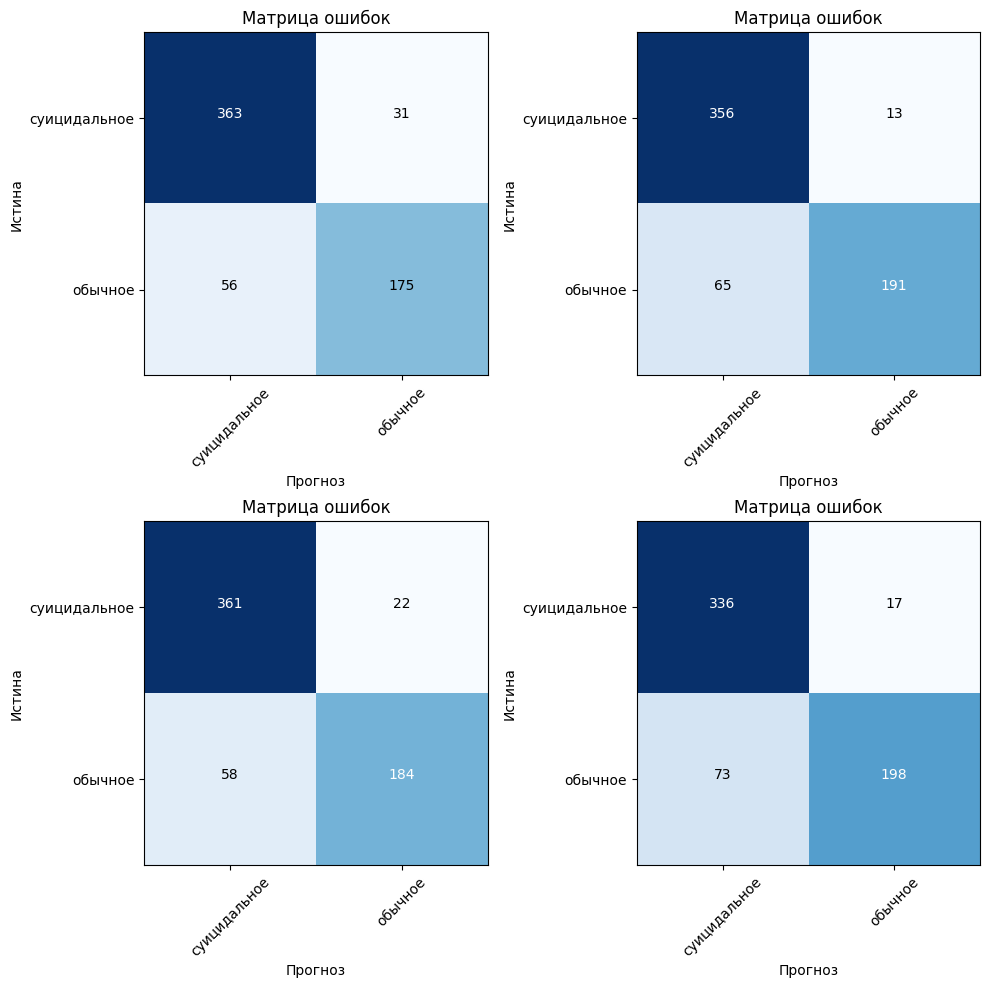

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

estimator = GradientBoostingClassifier(learning_rate=0.5, min_samples_split=2, n_estimators=60)
confusionMatrices(estimator=estimator, classes=["суицидальное", "обычное"])

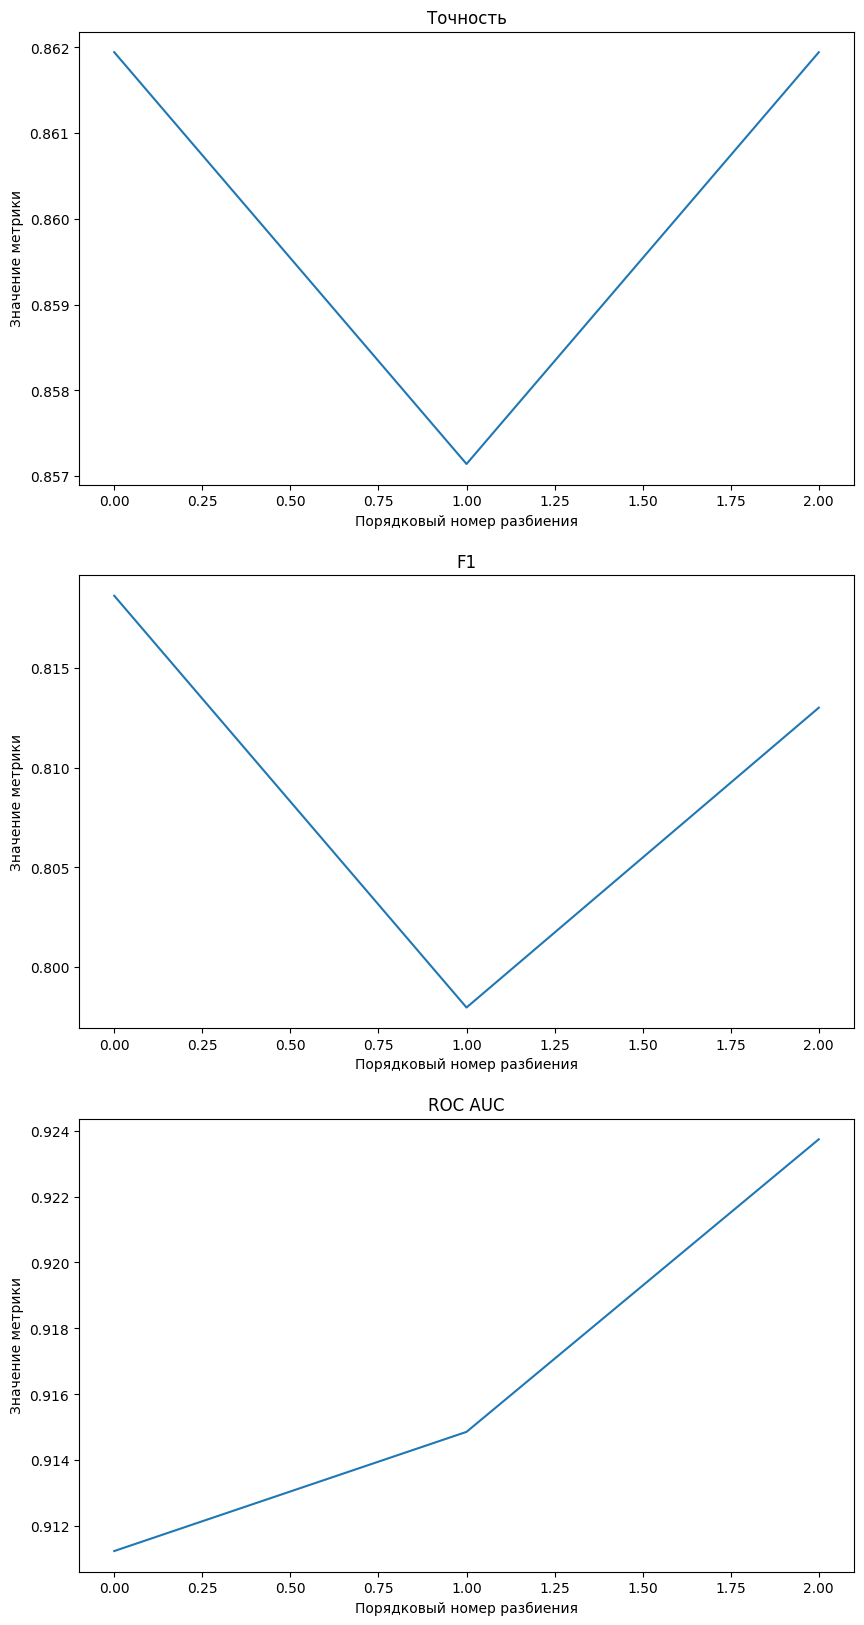

In [16]:
crossScores(estimator)

In [113]:
estimator.predict(vectorizer.transform([getClearSentences("Ща сдохну от смеха")]))

array([0])

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier()
gridSearch(estimator, paramGrid={'n_jobs': [-1],'n_estimators': [50, 100, 150], 'max_depth':[50, 100, 150], 'class_weight': [None, 'balanced', 'balanced_subsample'], 'max_features': ['sqrt', 'log2', None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]})

{'class_weight': None, 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50, 'n_jobs': -1}


Confusion matrix, without normalization
[[488  19]
 [ 75 251]]
Confusion matrix, without normalization
[[468  35]
 [ 73 257]]
Confusion matrix, without normalization
[[456  33]
 [ 63 281]]


<Figure size 2000x1000 with 0 Axes>

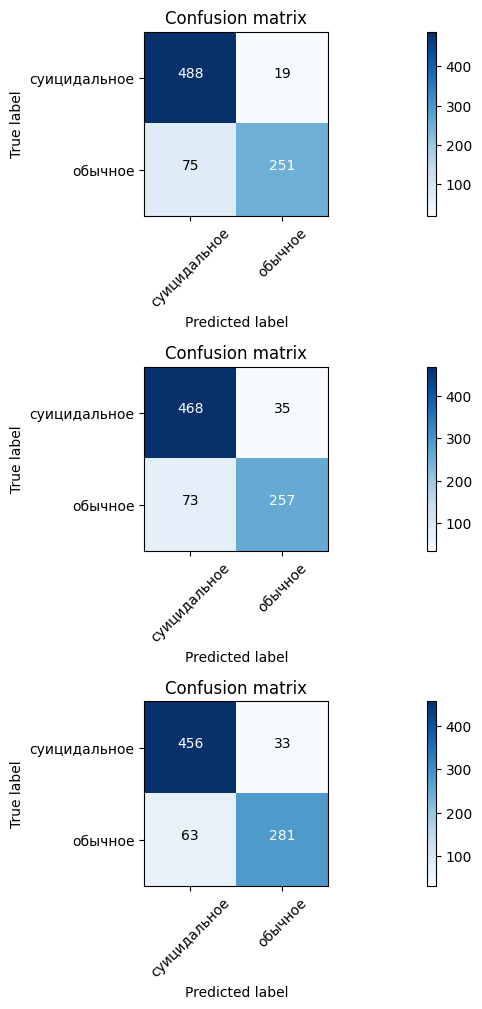

In [21]:
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier(class_weight=None, max_depth=100, max_features='sqrt', min_samples_leaf=1, n_estimators=50, n_jobs=-1)
plt.figure(figsize=(20, 10))
confusionMatrices(estimator, ["суицидальное", "обычное"])

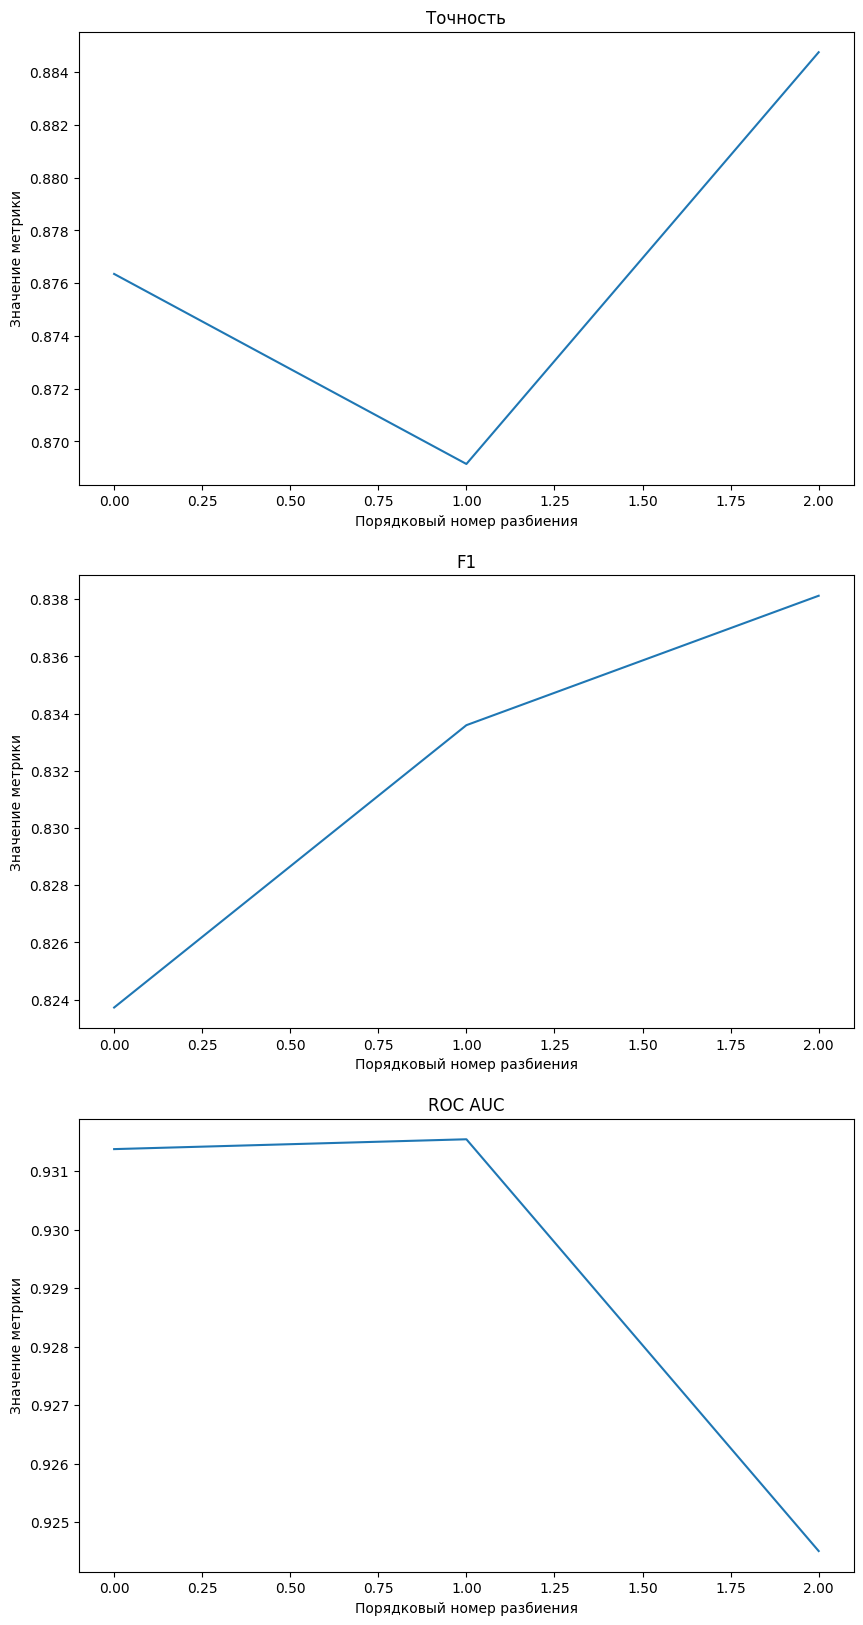

In [39]:
crossScores(estimator)

# SVC

In [ ]:
from sklearn.svm import SVC

estimator = SVC()
gridSearch(estimator, paramGrid={'C': [1.0, 2.0, 10.0, 100.0], 'degree': [3, 4, 6, 7], 'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
estimator = SVC(C=1.0, degree=3, kernel='linear')
confusionMatrices(estimator, ["суицидальное", "обычное"])

In [ ]:
crossScores(estimator)

# KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()
print(gridSearch(estimator, paramGrid={'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance'], 'leaf_size': [20, 30, 40], 'p': [1, 2, 4], 'metric': ['euclidean', 'manhattan']}))

{'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
None


Confusion matrix, without normalization
[[470  35]
 [142 186]]
Confusion matrix, without normalization
[[449  22]
 [171 191]]
Confusion matrix, without normalization
[[507  16]
 [179 131]]


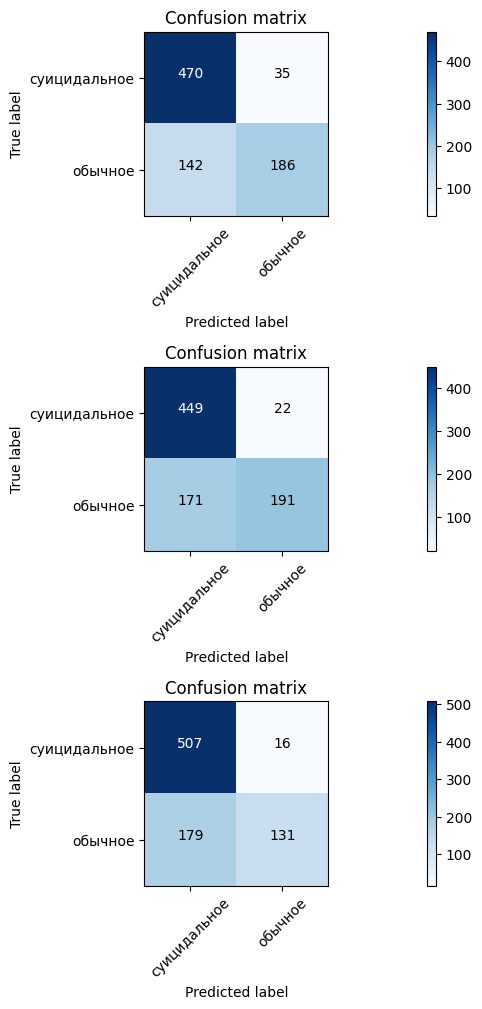

In [88]:
estimator = KNeighborsClassifier(n_neighbors=3, weights='distance', leaf_size=20, p=1, metric='euclidean')
confusionMatrices(estimator, ["суицидальное", "обычное"])

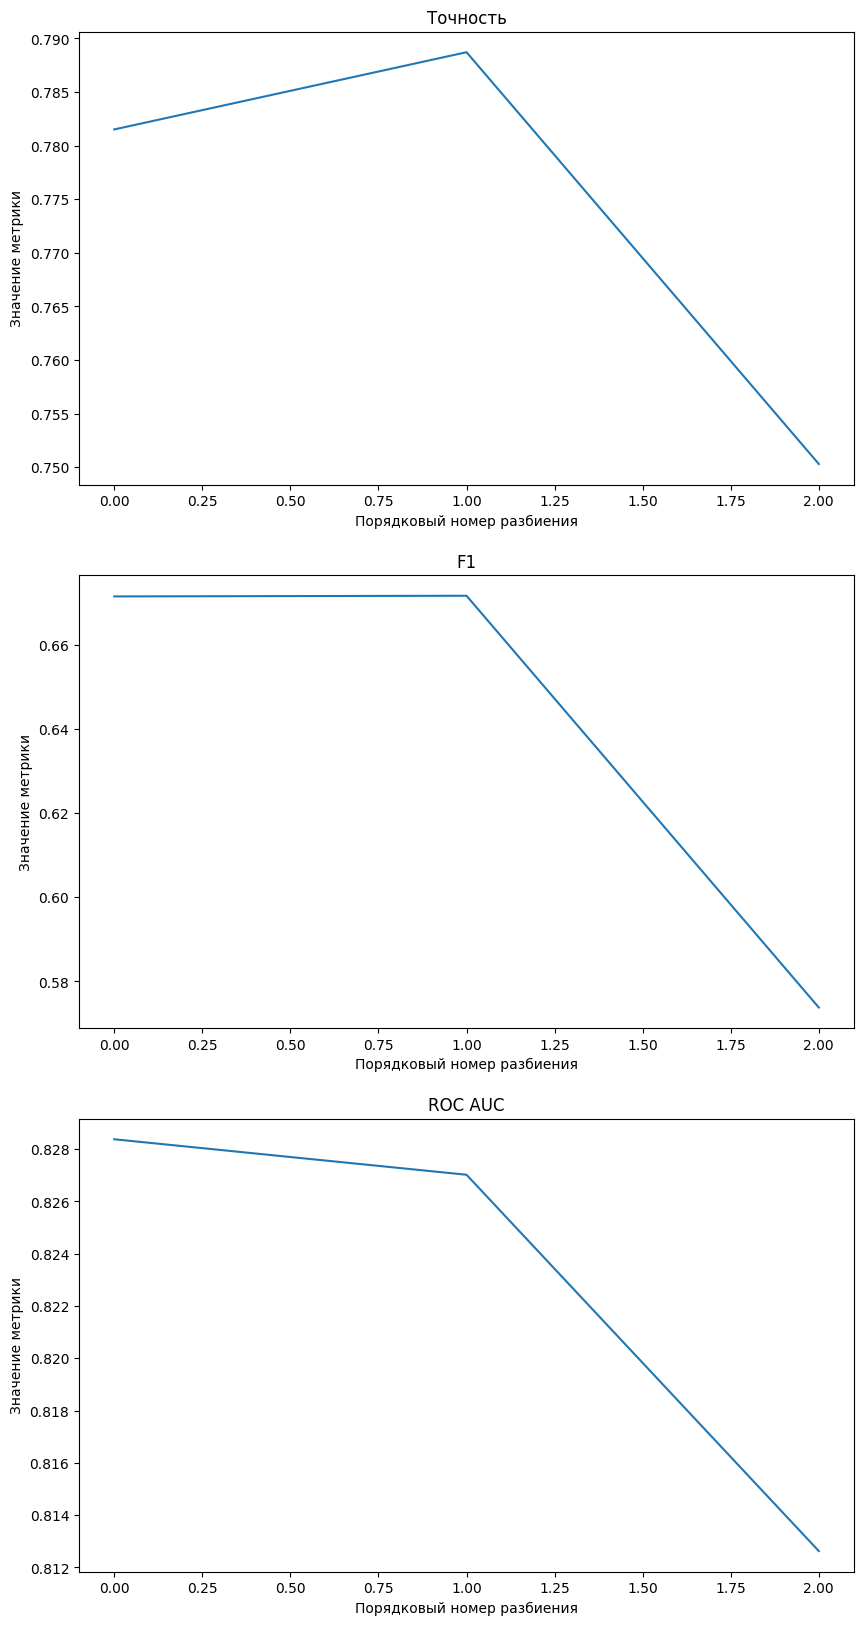

In [85]:
crossScores(estimator)

# Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()
gridSearch(estimator, paramGrid={'penalty': ['l2'], 'C': [2.1, 2.2, 2.3, 2.4], 'class_weight': [{0: 1, 1: 2}, {0: 2, 1: 1}, 'balanced', None], 'solver': ['lbfgs', 'liblinear', 'newton-ct']})

{'C': 2.2, 'class_weight': {0: 2, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.11/site-packages

Confusion matrix, without normalization
[[458  42]
 [ 48 285]]
Confusion matrix, without normalization
[[474  40]
 [ 70 249]]
Confusion matrix, without normalization
[[445  40]
 [ 66 282]]


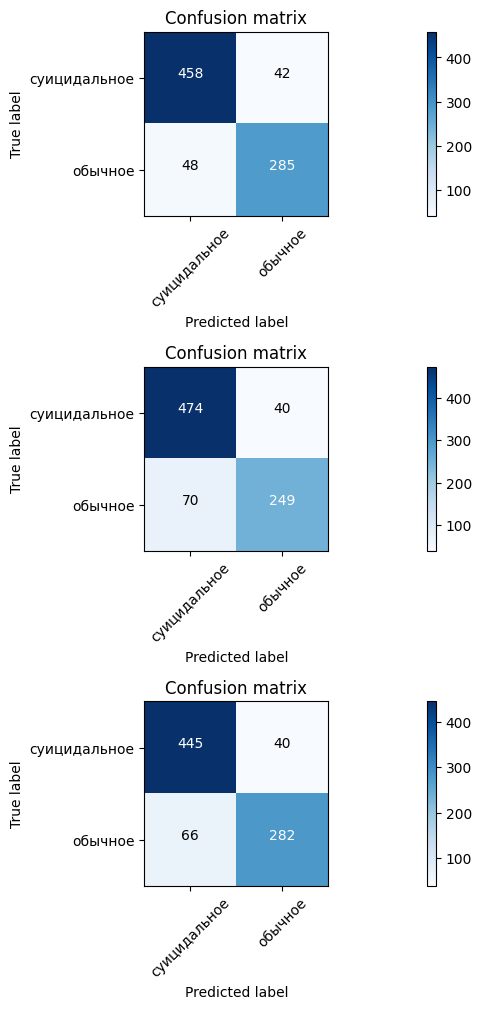

In [72]:
estimator = LogisticRegression(penalty='l2', C= 2.2, class_weight={0:1, 1:2}, solver='liblinear')
confusionMatrices(estimator, ["суицидальное", "обычное"])

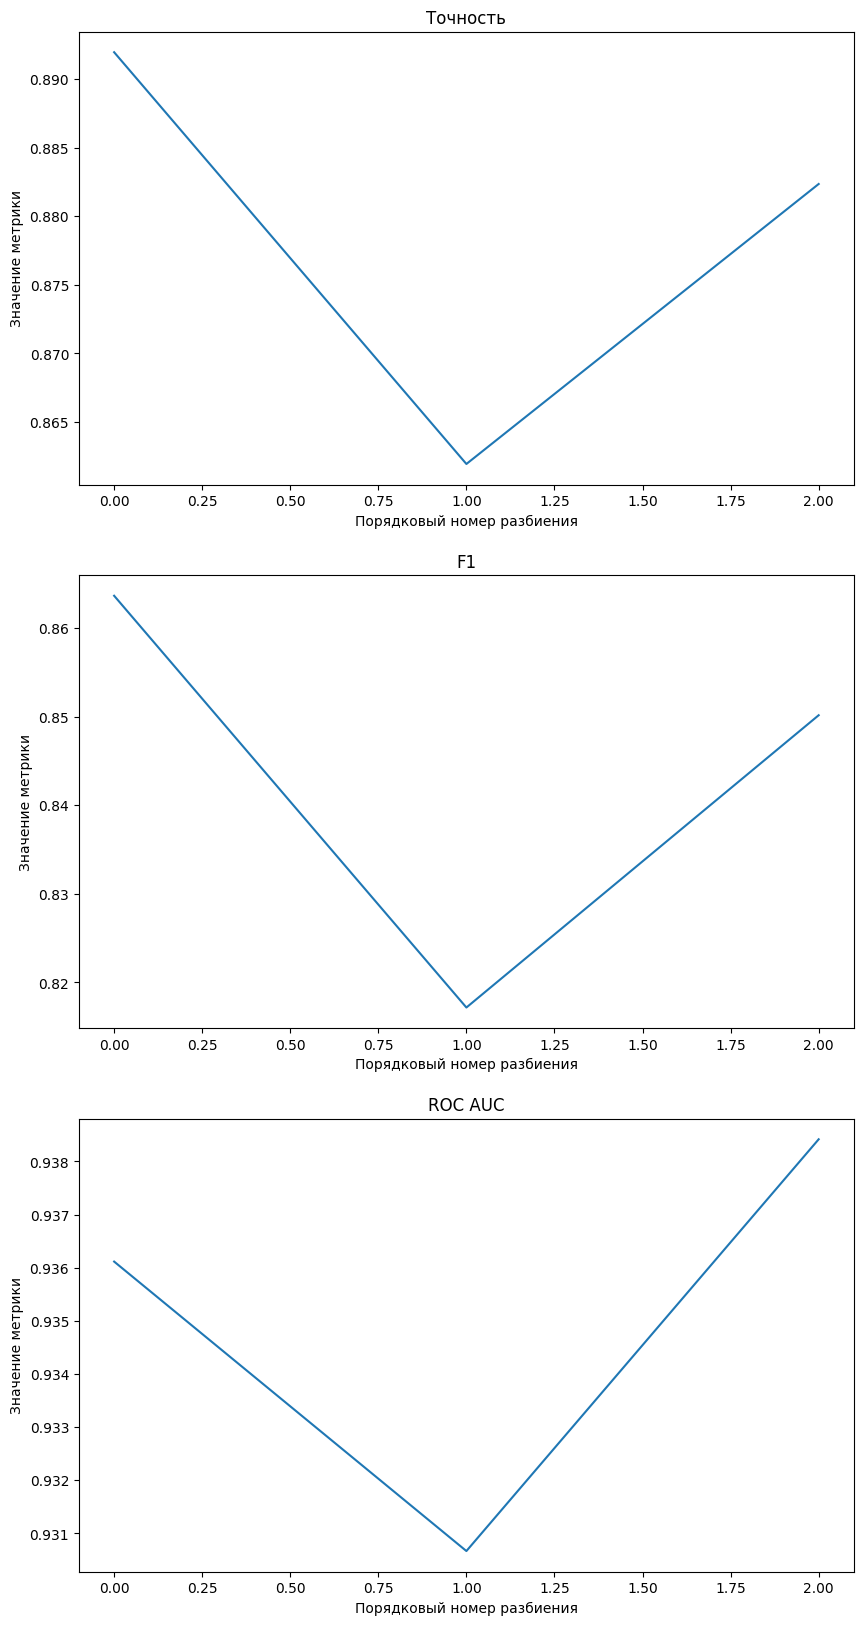

In [73]:
crossScores(estimator)

# Perceptron

In [6]:
from sklearn.linear_model import Perceptron

estimator = Perceptron()
gridSearch(estimator, paramGrid={'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.0005, 0.001], 'n_jobs': [-1], 'max_iter': [500, 1000, 1500], 'class_weight': [{0:1, 1:2}, {0:2, 1:1}, 'balanced', None]})

{'alpha': 0.0001, 'class_weight': {0: 2, 1: 1}, 'max_iter': 500, 'n_jobs': -1, 'penalty': 'l1'}


Confusion matrix, without normalization
[[434  49]
 [ 68 282]]
Confusion matrix, without normalization
[[453  59]
 [ 57 264]]
Confusion matrix, without normalization
[[438  66]
 [ 43 286]]


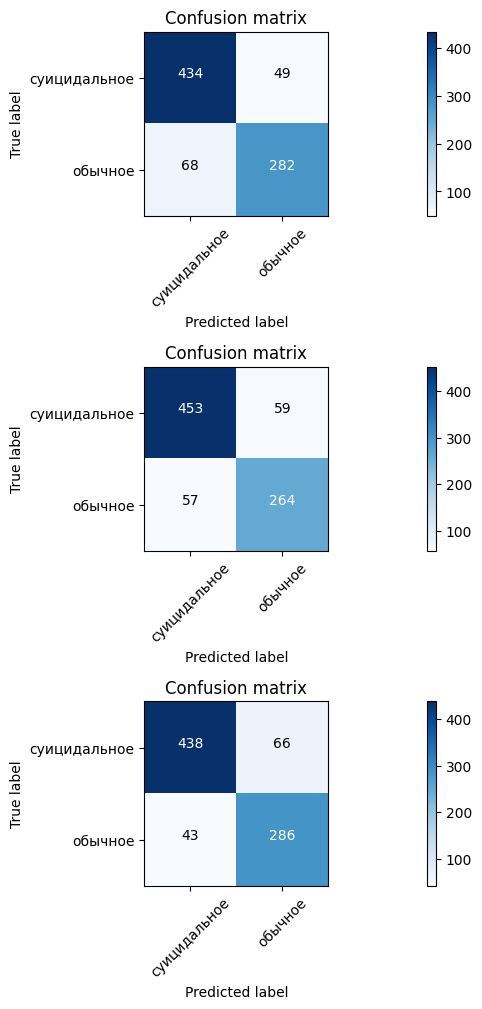

In [12]:
estimator = Perceptron(alpha=0.0001, class_weight={0:2, 1:1}, max_iter=500, penalty='l1', n_jobs=-1)
confusionMatrices(estimator, ["суицидальное", "обычное"])

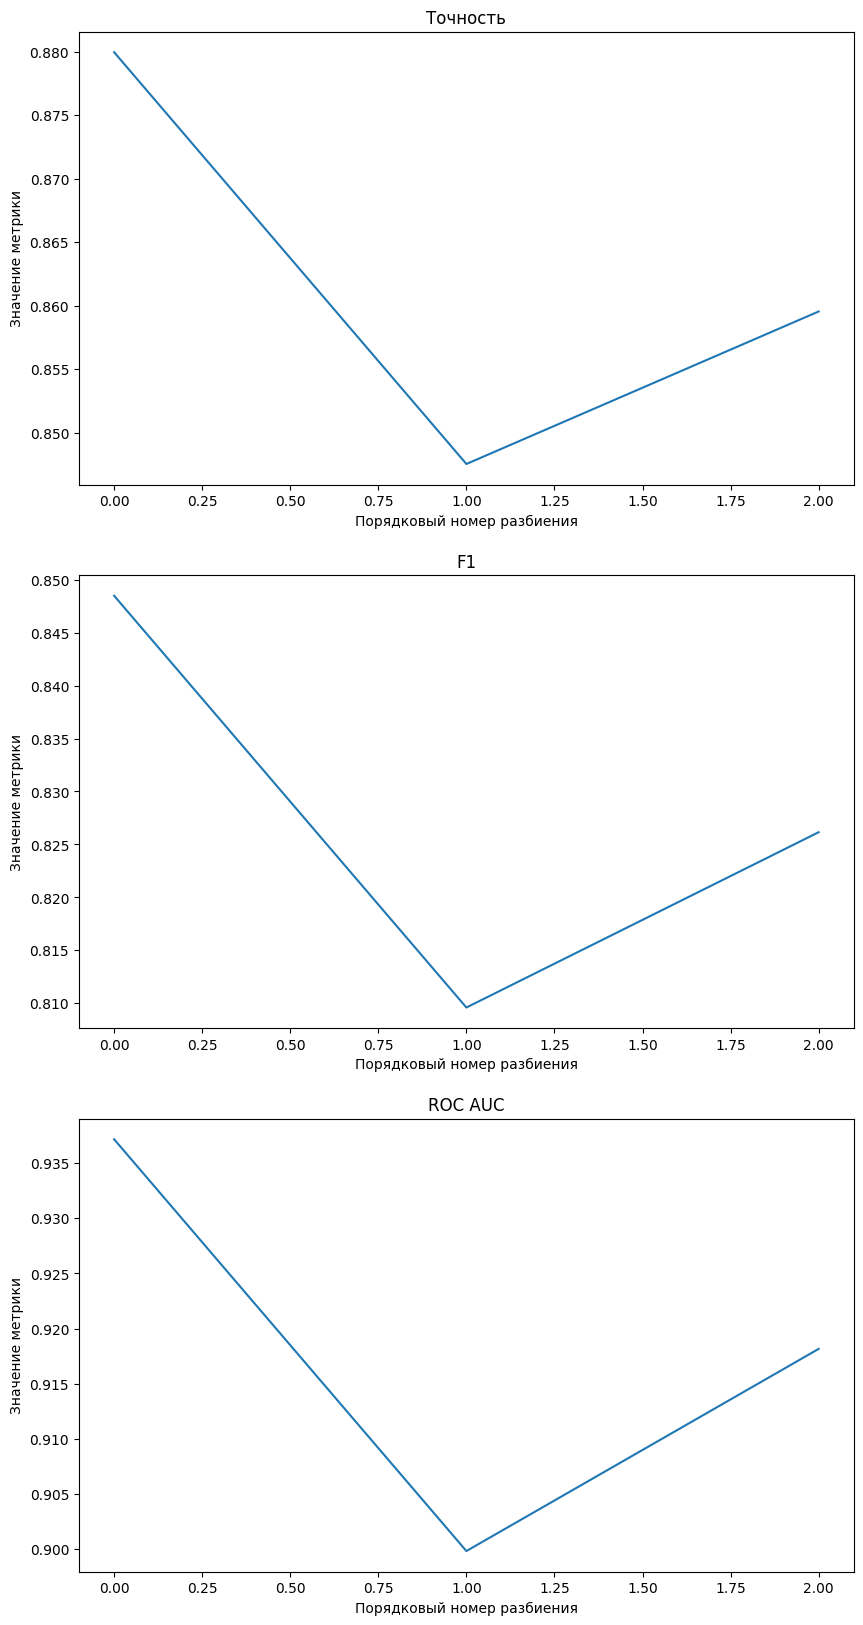

In [13]:
crossScores(estimator)

# Multilayer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

# серч запускать бесполезно, слишком долго, либо дать ему подышать два дня на серваке
estimator = MLPClassifier()
gridSearch(estimator, paramGrid={'hidden_layer_sizes': [10, 100, 500, 1000], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.0001, 0.0005, 0.001], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'learning_rate_init': [0.001, 0.005, 0.01]})